## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these test results.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision. For a user to "convert" means that they have decided to purchase the company's product.

<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

> a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


> b. Use the below cell to find the number of rows in the dataset.

In [3]:
df_rows = df.shape[0]
df_rows

294478

> c. The number of unique users in the dataset.

In [4]:
df_nunique_user = df.user_id.nunique()
df_nunique_user

290584

> d. The proportion of users converted.

In [5]:
df_prop_converted = df.converted.mean()
df_prop_converted

0.11965919355605512

> e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#count instances comparing landing_page to group
print(df.groupby(['landing_page', 'group']).count())

#new_page and control OR old_page and treatment
df_num_no_match = 1928 + 1965
df_num_no_match

                        user_id  timestamp  converted
landing_page group                                   
new_page     control       1928       1928       1928
             treatment   145311     145311     145311
old_page     control     145274     145274     145274
             treatment     1965       1965       1965


3893

> f. Do any of the rows have missing values?

In [7]:
df.isna().sum().max()

#no, there are no missing values.

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

> a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#drop rows where (group == treatment & landing_page == old_age) OR
#drop rows where (group == control & landing_page == new_page)
df_rows_drop = df.query('((group == "treatment" and landing_page == "old_page")) or ((group == "control" and landing_page == "new_page"))')

#store in new DataFrame
df2 = df.drop(df_rows_drop.index)
df2.shape[0]

290585

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

> a. How many unique **user_id**s are in **df2**?

In [10]:
df2_nunique_user = df2.user_id.nunique()
df2_nunique_user

290584

> b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
repeated = df2.groupby('user_id').size().reset_index(name='count')
repeated[repeated['count'] > 1]

,user_id,count
131712,773192,2


> c. What is the row information for the repeat **user_id**? 

In [11]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.drop(index=1899, inplace=True)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

> a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
df2.converted.mean()

0.11959708724499628

> b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
df2_control = df2[df2['group'] == 'control']
df2_control.converted.mean()

0.1203863045004612

> c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df2_treatment = df2[df2['group'] == 'treatment']
df2_treatment.converted.mean()

0.11880806551510564

> d. What is the probability that an individual received the new page?

In [16]:
df2.groupby('landing_page').size() / df2.shape[0]

landing_page
new_page    0.500062
old_page    0.499938
dtype: float64

> e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, we do not have sufficient evidence to say that the new treatment page leads to more conversions without hypothesis testing.**


*Observations*

1) Regardless of the page they received, the probability for an individual to convert is **11.96%**.However, we accounted for Simpson's Paradox by analyzing the probability of both the treatment and control groups to convert. The probability for an individual in the treatment group to convert is **11.88%**, while the probability for an individual in the control group to convert is **12.04%**. These values lie around the previously calculated 11.96% probability for all individuals to convert, so we do not have to worry much about Simpson's Paradox. However, it is still good practice to analyze probabilities separately among the control and experimental groups.

2) The probability that an individual received the new page is **50.00%**, while the probability of receiving the old page is **49.99%**. These values are very close, which proves that half of all unique users received the new page, while half of all other unique users received the old page. There are no duplicated user_ids, which means that each user received only 1 page throughout the whole experiment. This is a promising ratio because if half of all users received only 1 type of page, then our results will be more reliable as they are more *equally weighted*.

*Conclusions*

1) The probability for an individual in the treatment and control groups to convert are 11.88% and 12.04%, respectively. Though this is not a substantial increase in conversion rate for the new page, this is a difference of 0.16% more for the new page. Even in comparison to the probability for an individual to convert regardless of the page they received, 11.96%, the treatment conversion rate is still higher at 12.04%, with a difference of .08%. Because the difference is so small, and without any statistical significance, we do not have sufficient evidence to make a conclusion.

2) These results of conversion rates are reliable because a) the landing page & control groups are equally weighted, and 2) we accounted for Simpson's Paradox.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

***Words***

Null hypothesis: Individuals with the new page have an **equal or worse** conversion rate as individuals with the old page.

Alternative hypothesis: Individuals with the new page have a **higher** conversion rate than individuals with the old page.

***Notation***

$H_0: p_{new} - p_{old} \leq 0$

$H_1: p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

> a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
pnew = df2.converted.mean()
pnew

0.11959708724499628

> b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
#p_{old} = p_{new} under the null
pold = df2.converted.mean()
pold

0.11959708724499628

> c. What is $n_{new}$?

In [19]:
nnew = df2[df2['group'] == 'treatment'].shape[0]
nnew

145310

> d. What is $n_{old}$?

In [20]:
nold = df2[df2['group'] == 'control'].shape[0]
nold

145274

> e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [21]:
new_page_converted = np.random.normal(0, pnew, nnew)

> f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [22]:
old_page_converted = np.random.normal(0, pold, nold)

> g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
obs_diff = df2_treatment.converted.mean() - df2_control.converted.mean()
obs_diff

-0.0015782389853555567

> h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
p_diffs = []

new_page = np.random.binomial(nnew, pnew, 10000)/nnew
old_page = np.random.binomial(nold, pold, 10000)/nold

p_diffs = new_page - old_page

> i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

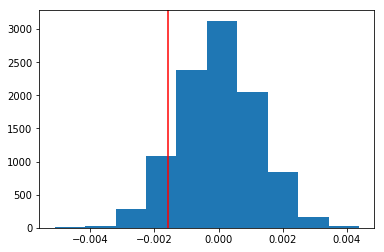

In [34]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

> j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
(p_diffs > obs_diff).mean()

0.9017

> k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*Answer*

This value is called the p-value. Given that the null hypothesis is true, it is the conditional probability that you'll find a statistic observing your data or in favor of the alternative hypothesis.

In terms of whether there is a difference or not between the old and new pages, the **p-value calculated is 0.9017**. This means that, on average, you will have a 0.9017 chance of finding the observed statistic (-0.001578), or finding an extreme value in favor of the hypothesis that $p_{new}$ is greater than $p_{old}$.

Since p = 0.9017 is significantly greater than the threshold for Type I error rates at 0.05, we fail to reject the null hypothesis that: $$p_{new} \leq p_{old}$$

$$or$$

$$p_{new} - p_{old} \leq 0$$

> l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest as ztest

#number of conversions for each page
convert_old = df2[df2['landing_page'] == 'old_page'].converted.sum()
convert_new = df2[df2['landing_page'] == 'new_page'].converted.sum()

#number of individuals who received each page
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

> m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
zstat, pval = ztest([convert_new, convert_old],
                 [n_new, n_old],
                 alternative='larger')

print(zstat, pval)

-1.3109241984234394 0.9050583127590245


> n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score calculated here is **-1.3109**. This means that the observed difference in conversion rates (-0.001578) between $p_{new}$ and $p_{old}$ is 1.3109 standard deviations away from the mean, which is 0. Let us examine the plot again.

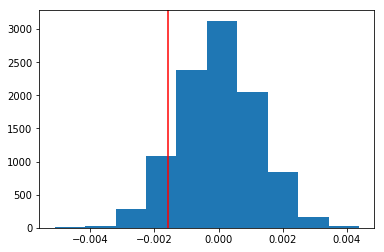

In [39]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

Our observed difference in conversion rates, -0.001578, is to the left of the mean, 0. The z-score is a negative value at -1.3109, which means that our observed statistics is less than the mean, and therefore to the left of the mean. Additionally, z = -1.3109 implies that our observed statistic is significantly less than 1 standard deviation away, and we can spot that our observed statistic barely inches away from our mean. Therefore this z-score is consistent and agrees with the calculated values found in j and k.

The p-value calculated here is **0.9050**. In regards to conversion rates, this can be interpreted as, "there is a 90.50% chance of finding the observed statistic (-0.001578) or an extreme in favor of the alternative hypothesis that the conversion rate for the new page is higher than that of the old page."

This p-value agrees with the p-value in parts j and k because p = 0.9050 is also greater than the threshold for Type I errors at 0.05, so again we fail to reject the null hypothesis that the conversion rate for the new page is equal to or worse than that of the old page. In addition, they are both very large p-values at over 0.90.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

> a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression.

> b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
#create intercept, map to new df
df2a = df2.copy()
df2a['intercept'] = 1

#create dummy variables for landing_page, map to new df
ab_dummies = pd.get_dummies(df2a['landing_page'])
df2b = df2a.join(ab_dummies)
df2b.rename(columns = {'new_page' : 'ab_page'}, inplace=True)
df2b.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [41]:
#drop baseline variable, 'old_page'
df2b.drop('old_page', axis = 1, inplace = True)
df2b.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


> c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
import statsmodels.api as sm

rm = sm.Logit(df2b['converted'], df2b[['intercept', 'ab_page']])

> d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
rm.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:46:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

> e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with **ab_page** is **0.190**. In comparison to the p-value found under hypothesis testing in the A/B Test case, **0.9017**, this p-value is significantly less, by approximately over 1/2.

The logistic regression model uses a **two-tailed test** while the hypothesis testing uses a **one-tailed test**. Here is a comparison of the null and alternative hypotheses between each:

**Two-Tailed Test (Logistic Regression):**
$$H_0 : p_{new} = p_{old}$$
$$H_1 : p_{new} \neq p_{old}$$

**One-Tailed Test (Hypothesis Testing):**
$$H_0 : p_{new} - p_{old} \leq 0$$
$$H_1 : p_{new} - p_{old} > 0$$

Our regression model uses a two-tailed approach to predict the likelihood of finding a value on both extremes of the normal distribution in favor of the alternative hypothesis. Our response variable is *binary*, resulting in an outcome of either 0 or 1. That type of outcome is supported with the structure of the null and alternative hypotheses for logistic regression, where a **not equal to** in the alternative hypothesis calls to examine both ends of extremes in the normal distribution.

On the other hand, our hypothesis test uses a one-tailed approach to predict the likelihood of finding a value which lies in the extreme in favor of the alternative hypothesis. Our response variable is a *difference in mean conversion rates*. The alternative hypothesis states that the difference in mean conversion rates **must be greater than 0**, implying that the conversion rates for the new page are *higher*. Therefore, in the normal distribution simulated under the null hypothesis, the p-value for all null values greater than our observed statistic are used instead.

It makes sense that the p-value associated with our regression model is almost cut in half from the p-value from our hypothesis test. Since our logistic regression model uses two-tailed testing, the negative values from the other extreme end would reduce the p-value by approximately 1/2.

> f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding additional terms into the regression model can increase the likelihood of multicollinearity. Throughout this project there has been no need to use bivariate plots or variance inflation factors (ViF's) to check for multicollinearity, as only conversion and type of group/page received were the only variables used in our hypothesis testing and regression model. In addition, adding more variables also increases the likelihood of non-constant variance among residuals, and may call for using higher-order terms to correctly interpret our results.

> g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [46]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])

df_newa = df_new.join(country_dummies)
df_newa.head()

,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


In [47]:
#'US' as baseline country
df_newa['intercept'] = 1
rm_a = sm.Logit(df_newa['converted'], df_newa[['intercept', 'CA', 'UK']])
rm_a.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Jun 2019   Pseudo R-squ.:               1.521e-05
Time:                        15:46:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [48]:
#exponentiate coefficients
CA = np.exp(-0.0408)
UK = 1/np.exp(0.0099)

UK, CA

(0.9901488436829571, 0.9600211149716509)

**Interpreting coefficients**

For users from Canada, conversion is 96% as likely as users from the United States, holding all else constant.

For users from the United States, conversion is 99% as likely as users from the UK, holding all else constant.

**Interpreting p-values**

Because the p-valus are all greater than 0.05, the explanatory variable 'country' is not statistically significant in predicting whether any given user will convert.

However, the p-value for users from Canada is 0.129 while the p-value for users from the UK is 0.456. This means that users based in Canada are more statistically significant than users in the UK in predicting whether or not the user will convert when compared to users in the US. These values are consistent with our coefficients, because users in Canada are far more likely in comparison to users in US. On the flipside, users in the UK are far less likely to convert in comparison to users in the US.

> h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an ***interaction*** between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
#get page dummies
page_dummies = pd.get_dummies(df_new['landing_page'])
page_dummies.head()

,new_page,old_page
user_id,,
834778,0,1
928468,1,0
822059,1,0
711597,0,1
710616,1,0


In [50]:
#form new df with all necessary columns
df_newb = df_newa.join(page_dummies)
df_newb.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,new_page,old_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,0


In [51]:
df_newb = df_newb.rename(columns = {'new_page' : 'ab_page'} )
df_newb.drop('old_page', axis = 1, inplace = True)
df_newb.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1


In [52]:
#create interaction column
df_newc = df_newb.copy()
df_newc['intercept'] = 1
df_newc['UK_ab_page'] = df_newb['UK'] * df_newb['ab_page']
df_newc['CA_ab_page'] = df_newb['CA'] * df_newb['ab_page']
df_newc.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,ab_page,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,1,0


In [53]:
#logistic regression model with US and old_page as baseline
rm_b = sm.Logit(df_newc['converted'], df_newc[['intercept', 'UK', 'CA', 'ab_page', 'UK_ab_page', 'CA_ab_page']])
rm_b.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Jun 2019   Pseudo R-squ.:               3.482e-05
Time:                        15:46:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

In [55]:
#exponentiate coefficients

UK2 = np.exp(-.0046)
CA2 = np.exp(-0.0175
            )
ab_page = np.exp(-0.0236)
UK_ab_page = np.exp(-0.0236)
CA_ab_page = np.exp(-0.0469)

UK2, CA2, ab_page, UK_ab_page, CA_ab_page

(0.9954105637959723,
 0.9826522356650732,
 0.976676302155084,
 0.976676302155084,
 0.9541828111007262)

Before interpreting the coefficients, it is useful to understand the concept of the interactions. For the variable 'UK_ab_page', the product of 'UK' and 'ab_page' equals 1 ***when the user is both from the UK and has received a new page.*** For the variable 'CA_ab_page', the product of 'CA' and 'ab_page' equals 1 ***when the user is both from Canada and has received a new page.***

**Interpreting coefficients**

For all users in the UK, conversion is 99.54% as likely as users from the United States, holding all else constant.

For all users in Canada, conversion is 98.26% as likely as users from the United States, holding all else constant.

For all users who received the new page, conversion is 97.66% as likely as users who received the old page, holding all else constant.

For all users who are **both** based in the UK and have received the new page, conversion is 97.66% as likely as users who are based in the US **and** received the old page.

For all users who are **both** based in Canada and have received the new page, conversion is 95.54% as likely as users who are based in the US **and** received the old page.

The results for coefficients in interaction between the UK and page on conversion rates (part h) are consistent with the coefficients in interaction between the UK and conversion rates alone (part g). This means that multicollinearity did not prove to be an issue between 'UK', 'ab_page', and 'UK_ab_page', as there is no visible dependency between the explanatory variables of country and type of page received. In addition, the exponentiated coefficients for 'UK_ab_page' and 'ab_page' are exactly the same in this logistic regression model, which helps to prove the statement that multicollinearity is not an issue with these variables.

**Interpreting p-values**

All of the p-values are greater than 0.05, so none of the explanatory variables are statistically significant in predicting the conversion of a user. The explanatory variables being examined are: the type of page received, country the user is based in, and interaction between type of page and country.

<a id='conclusions'></a>
## Conclusions

After examining our cleaned dataset through A/B testing and and a logistic regression approach, it can be safely concluded that **the website should switch to the new page.**

In **Part I - Probability**, we explored and sanitized our dataset. This included finding incongruencies between the type of group (treatment or control) and what type of landing page they received (new or old). We dropped all instances where treatment did not match the new page and where control did not match the old page. We also accounted for conversion rates for all users regardless of the type of page they received, then counted conversion rates among users in the treatment and control groups separately. This was a safeguard in the case of Simpson's Paradox. We found that ***conversion rates among those in the control and experimental group are roughly similar at 11.88% and 12.04%, respectively.*** These results are reliable because the probability of receiving either the old or new page for any user is equally weighted.

In **Part II - A/B Testing**, we created a null and alternative hypothesis, implemented hypothesis testing through simulating under the null, and applied Z-Score testing. The null and alternative hypotheses focused on the difference in means of conversion rates for the old and new page, where it is summarized as follows:

$$H_0 : p_{new} - p_{old} \leq 0$$
$$H_1 : p_{new} - p_{old} > 0$$

After normalizing a sampling distribution under the null hypothesis, we found that the proportion of null values greater than our observed statistic (-3.177) was ***p = 0.9017***. Because this p-value is greater thant the threshold for Type I error rates at 0.05, we ***fail to reject the null hypothesis that conversion rates for users who received the new page are equal to or worse than the conversion rates for users who received the old page.***

To receive similar results, we used Z-testing afterward using `stats.proportions_ztest`. The p-value calculated was 0.9050 and the Z-score was -1.3109. The p-value was similar to our previously-calculated p-value by an increase the thousandths place after the decimal. The negative value of the Z-score is consistent with the visualization of the normalized distribution under the null, as our observed statistic (-3.177e-07) lies to the left of the mean, 0. 

In **Part III - A Regression Approach**, we created yet another null and alternative hypothesis, then fit three logistic regression models. The null and alternative hypotheses for the logistic regression models were rearranged as follows:

$$H_0 : p_{new} = p_{old}$$
$$H_1 : p_{new} \neq p_{old}$$

After created dummy variables for the type of landing page a user received (1 for new page and 0 for old), we created a logistic regression model with 'converted' as the response variable with 'intercept' and 'ab_page' as the explanatory variables. After fitting this model, we received a p-value of **0.190** for users who received the new page. In comparison to the p-value calculated in Part II (0.9017), this p-value is cut by approximately half. 

Afterwards, we created a new DataFrame matching users with the country they were based in. Two regression models were created accounting for the country. The 1st model investigated the interaction between country and conversion rates alone. The 2nd model investigated the interaction between country & type of page received as explanatory variables, with conversion still being the response variable. The baseline variables were users based in the US and users who received the old page. The exponentiated coefficients between 'UK' and 'UK_ab_page' (users based in the UK & users based in the UK **and** received the new page) are the same at 0.9766. This suggests that there is no dependency between the explanatory variables 'UK', 'UK_ab_page', and 'ab_page', and thus multicollinearity should not be a problem.

### Wrapping It Up

The reason for these differences in p-values between the first regression model in Part III (**0.190**) and the hypothesis test in Part II (**0.9017**) is due to the difference in the types of testing. Part II's null and alternative hypothesis makes use of a one-tailed test while those in Part III's regression model makes use a two-tailed testing. This is due to the structure of both models' null and alternative hypotheses, where one calls for the proportion of extremes at the right-end tail, while the other calls for the proportion of extremes on both ends respectively.

**Statistical Significance**

The threshold for Type I errors is at 0.05. Under all cases (hypothesis testing, Z-score, and logistic regression models), we never received a p-value less than the threshold. Therefore, ***we can safely conclude that we cannot determine if the new page increases the likelihood of conversion. Thus the website should conduct the A/B test for a longer period of time to see if a greater sample size would increase the variability of the response.***

**Practical Significance**

In Part I, the conversion rates among those in the control and treatment groups were at 11.88% and 12.04% respectively. Even if we decided to ignore statistical significance, the difference in conversion rates among the groups--0.16%--is too small to implement the new page design. In addition, using the time and resources to add the new page design may likely outweight this marginal benefit of an approximately +% conversion rate, ***so we can safely conclude that due to the barely marginal benefit of new conversion rates compared to the costs needed to deploy the new design, it is also not practically significant to switch to the new page design.***

